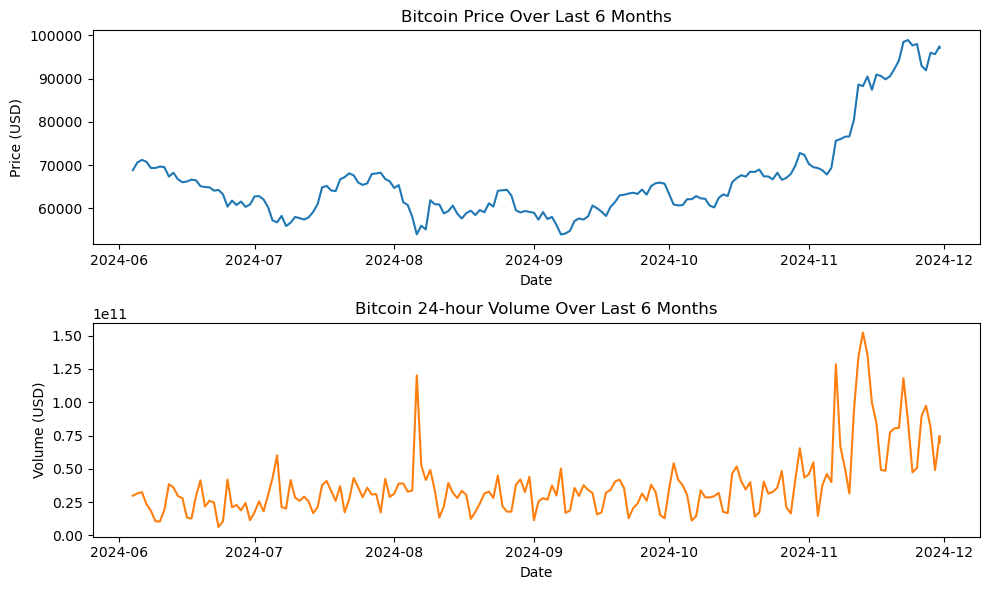

In [154]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define the CoinGecko API URL for historical data
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '180',  # 6 months (180 days)
    'interval': 'daily'  # Daily data
}

# Send the request to the CoinGecko API
response = requests.get(url, params=params)

# If the request is successful, process the data
if response.status_code == 200:
    data = response.json()
    
    # Extract price and volume data
    prices = data['prices']
    volumes = data['total_volumes']
    
    # Convert to DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['volume'] = [volume[1] for volume in volumes]
    
    # Convert timestamp to datetime
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Plot Bitcoin price and volume over the last 6 months
    plt.figure(figsize=(10,6))
    
    # Plot Price
    plt.subplot(2, 1, 1)
    plt.plot(df['date'], df['price'], label="Price", color='tab:blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Bitcoin Price Over Last 6 Months')
    
    # Plot Volume
    plt.subplot(2, 1, 2)
    plt.plot(df['date'], df['volume'], label="Volume", color='tab:orange')
    plt.xlabel('Date')
    plt.ylabel('Volume (USD)')
    plt.title('Bitcoin 24-hour Volume Over Last 6 Months')
    
    plt.tight_layout()
    plt.show()

else:
    print("Error fetching data")

In [155]:
# Extract price and volume data
prices = data['prices']
volumes = data['total_volumes']

# Convert to DataFrame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['volume'] = [volume[1] for volume in volumes]

# Convert timestamp to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    

In [156]:
df = df.tail(60)

In [157]:
df.tail()

,timestamp,price,volume,date
176,1732665600000,91931.830773,9.738924e+10,2024-11-27 00:00:00
177,1732752000000,95981.180572,8.146935e+10,2024-11-28 00:00:00
178,1732838400000,95661.595958,4.906793e+10,2024-11-29 00:00:00
179,1732924800000,97453.247345,7.467003e+10,2024-11-30 00:00:00
180,1732927409000,97097.205946,6.980710e+10,2024-11-30 00:43:29


In [158]:
df['volume'] = df['volume'] / 1_000_000_000
# df

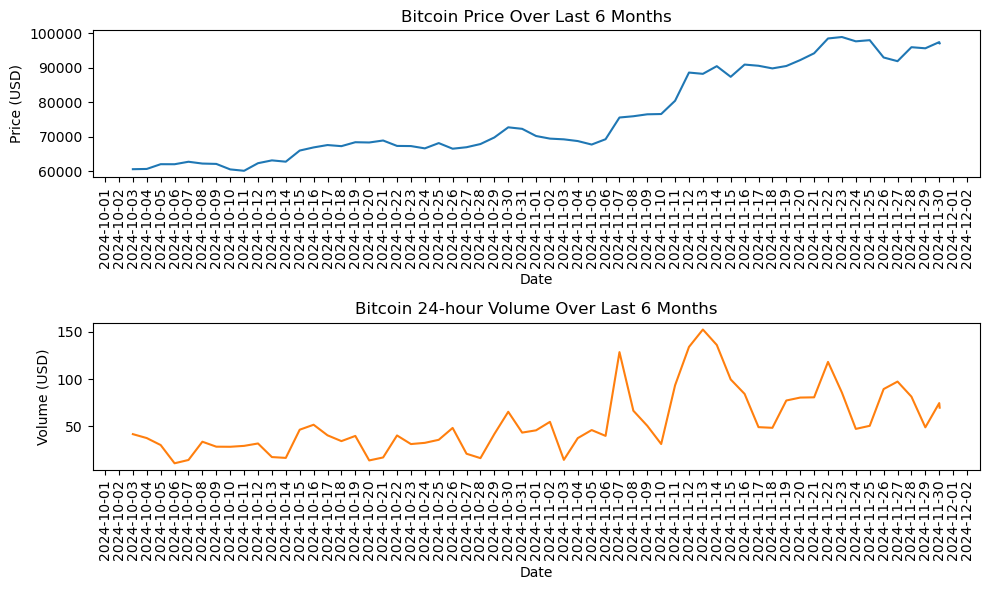

In [159]:
plt.figure(figsize=(10,6))

# Plot Price
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['price'], label="Price", color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Last 6 Months')
plt.xticks(df['date'][::1], rotation=90)  # Set ticks every 10 days for clarity
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=90))  # Display daily ticks
    
# Plot Volume
plt.subplot(2, 1, 2)
plt.plot(df['date'], df['volume'], label="Volume", color='tab:orange')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin 24-hour Volume Over Last 6 Months')

plt.xticks(df['date'][::1], rotation=90)  # Set ticks every 10 days for clarity
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=90))  # Display daily ticks
    

plt.tight_layout()
plt.show()



/tmp/ipykernel_1892985/3915285196.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A d

                  date  predicted_volume
61 2024-12-01 05:36:16      8.016887e+10
62 2024-12-02 05:36:16      8.318904e+10
63 2024-12-03 05:36:16      7.903828e+10
64 2024-12-04 05:36:16      7.180185e+10
65 2024-12-05 05:36:16      7.272015e+10
66 2024-12-06 05:36:16      7.458389e+10
67 2024-12-07 05:36:16      7.689835e+10


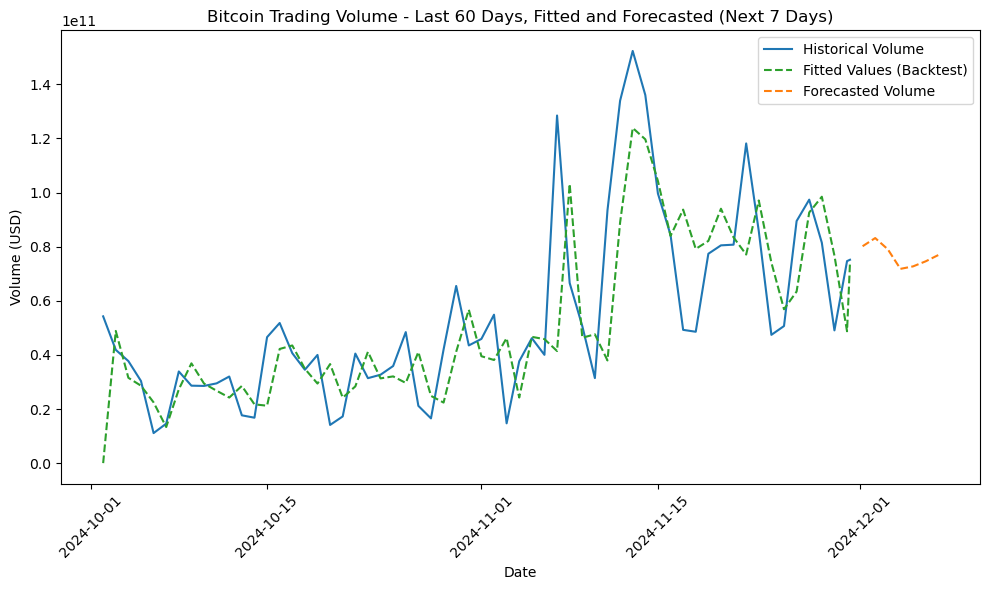

In [160]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Fit the ARIMA model (we'll use ARIMA(5,1,0) as a basic example, but this could be optimized)
model = ARIMA(df, order=(5,1,0))  # p=5, d=1, q=0 (for simplicity, you may want to tune these parameters)
model_fit = model.fit()

# Step 5: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.fittedvalues  # Fitted values for the historical data

# Step 6: Forecast the next 7 days
forecast = model_fit.forecast(steps=7)  # Forecast for the next 7 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 8)]  # Next 7 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 7: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1892985/1470000893.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A d

                  date  predicted_volume
61 2024-12-01 05:36:16      7.099055e+10
62 2024-12-02 05:36:16      8.121394e+10
63 2024-12-03 05:36:16      9.038633e+10
64 2024-12-04 05:36:16      9.147392e+10
65 2024-12-05 05:36:16      7.905807e+10
66 2024-12-06 05:36:16      6.760775e+10
67 2024-12-07 05:36:16      6.282089e+10


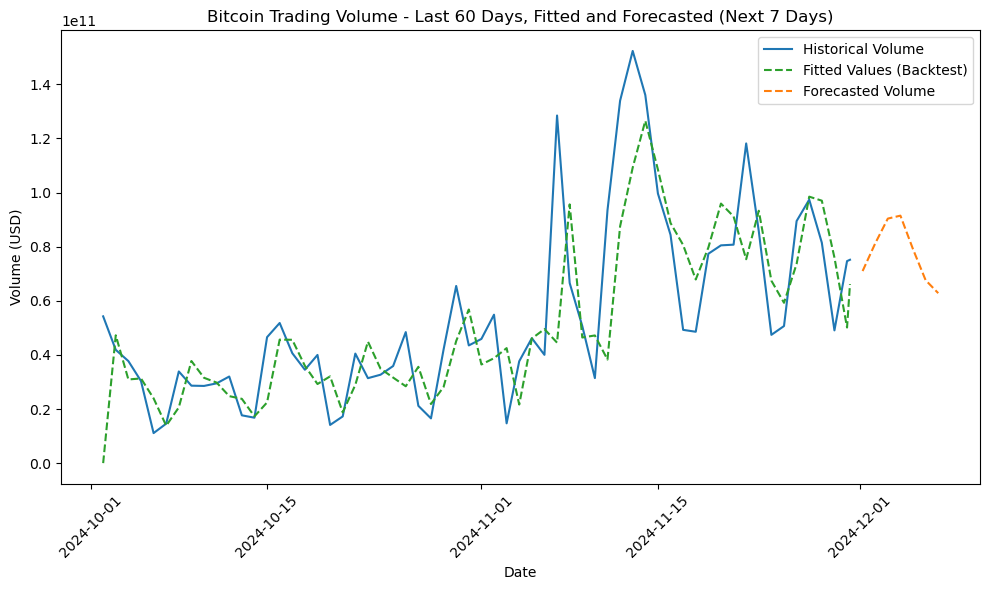

In [161]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Fit the ARIMA model (we'll use ARIMA(5,1,0) as a basic example, but this could be optimized)
model = ARIMA(df, order=(7,1,5))  # p=5, d=1, q=0 (for simplicity, you may want to tune these parameters)
model_fit = model.fit()
# (10, 1, 7)
# Step 5: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.fittedvalues  # Fitted values for the historical data

# Step 6: Forecast the next 7 days
forecast = model_fit.forecast(steps=7)  # Forecast for the next 7 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 8)]  # Next 7 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 7: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [162]:
# !pip install pmdarima

In [163]:
# !pip install pandas yfinance pmdarima matplotlib

[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/j/anaconda3/lib/python3.12/site-packages/st

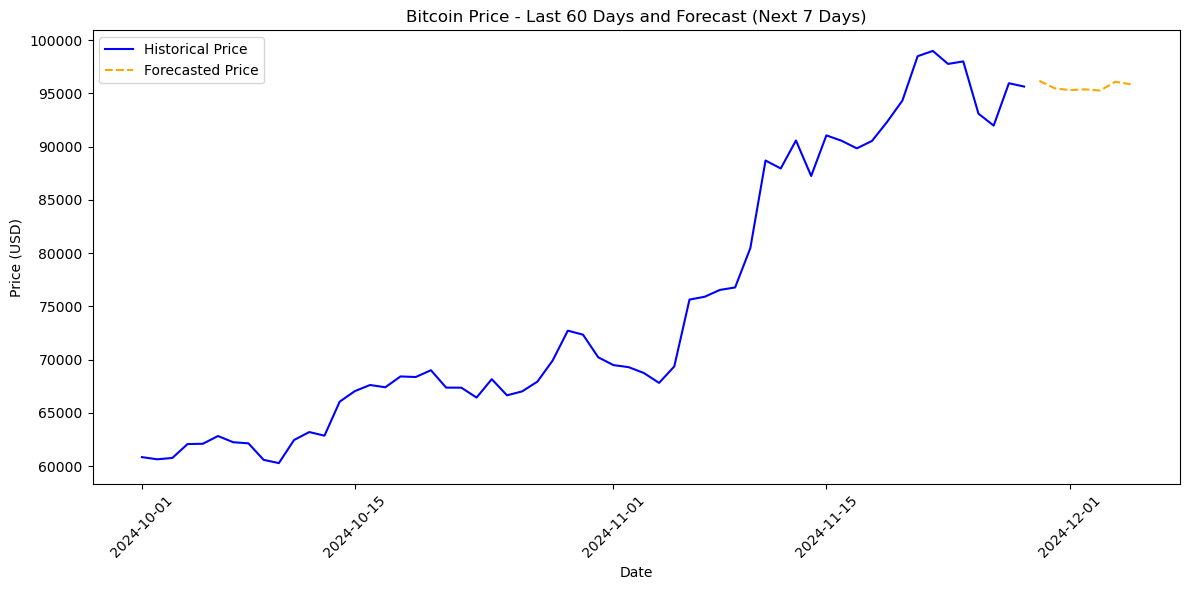

                 date  predicted_price
2024-11-29 2024-11-29     96193.359082
2024-11-30 2024-11-30     95490.546097
2024-12-01 2024-12-01     95319.859842
2024-12-02 2024-12-02     95389.833890
2024-12-03 2024-12-03     95279.997777
2024-12-04 2024-12-04     96100.352203
2024-12-05 2024-12-05     95870.357026


In [164]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Fetch Bitcoin data for the last 60 days
symbol = "BTC-USD"
end_date = datetime.now()
start_date = end_date - timedelta(days=60)

# Download the data
btc_data = yf.download(symbol, start=start_date, end=end_date)
btc_data = btc_data[['Close']]  # Use the closing price
btc_data.rename(columns={'Close': 'price'}, inplace=True)

# Fit ARIMA model with specified order (5, 1, 0)
model = ARIMA(btc_data['price'], order=(7, 1, 5))
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)
future_dates = [btc_data.index[-1] + timedelta(days=i) for i in range(1, 8)]

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_price': forecast})

# Plot historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['price'], label='Historical Price', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price - Last 60 Days and Forecast (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the forecasted data
print(forecast_df)


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/j/anaconda3/lib/python3.12/site-packages/st

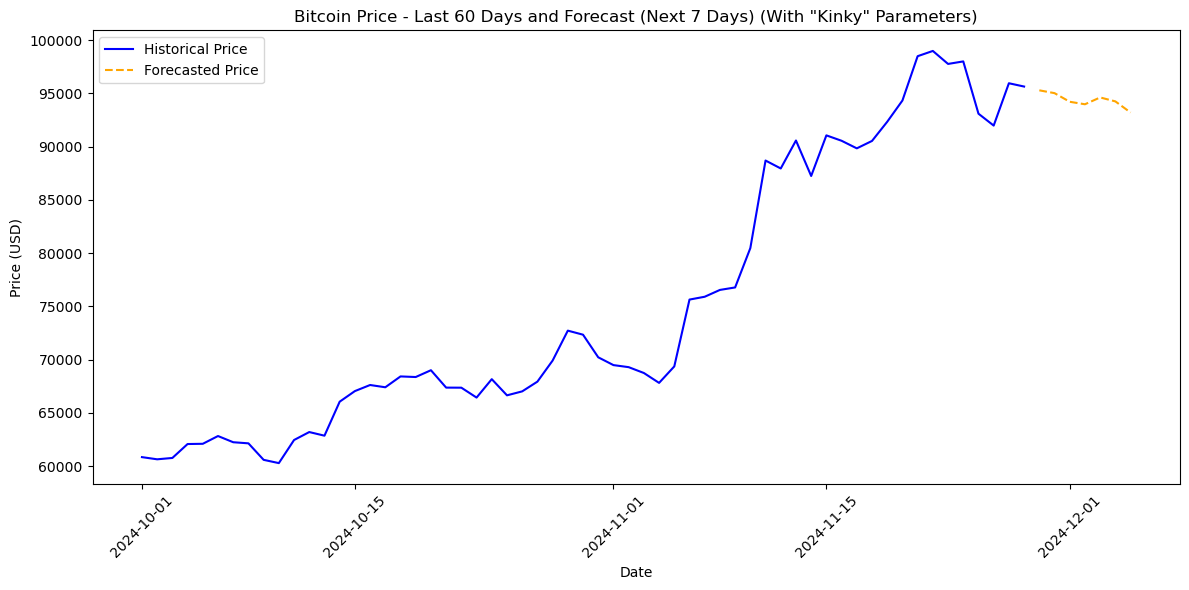

                 date  predicted_price
2024-11-29 2024-11-29     95297.320403
2024-11-30 2024-11-30     95032.850044
2024-12-01 2024-12-01     94221.590058
2024-12-02 2024-12-02     93987.301979
2024-12-03 2024-12-03     94628.373567
2024-12-04 2024-12-04     94258.378524
2024-12-05 2024-12-05     93211.062164


In [165]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Fetch Bitcoin data for the last 60 days
symbol = "BTC-USD"
end_date = datetime.now()
start_date = end_date - timedelta(days=60)

# Download the data
btc_data = yf.download(symbol, start=start_date, end=end_date)
btc_data = btc_data[['Close']]  # Use the closing price
btc_data.rename(columns={'Close': 'price'}, inplace=True)

# Fit ARIMA model with "kinky" parameters (e.g., (9, 1, 7))
model = ARIMA(btc_data['price'], order=(10, 1, 7))
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

# Add stochastic noise for even more dynamic projections
noise = np.random.normal(0, 100, size=7)  # Adjust scale for more volatility
forecast_with_noise = forecast + noise
future_dates = [btc_data.index[-1] + timedelta(days=i) for i in range(1, 8)]

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_price': forecast_with_noise})

# Plot historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['price'], label='Historical Price', color='blue')
plt.plot(future_dates, forecast_with_noise, label='Forecasted Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price - Last 60 Days and Forecast (Next 7 Days) (With "Kinky" Parameters)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the forecasted data
print(forecast_df)


/tmp/ipykernel_1892985/3511965147.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A d

                  date  predicted_volume
61 2024-12-01 05:36:16      6.220528e+10
62 2024-12-02 05:36:16      7.242110e+10
63 2024-12-03 05:36:16      9.137297e+10
64 2024-12-04 05:36:16      9.095581e+10
65 2024-12-05 05:36:16      7.640268e+10
66 2024-12-06 05:36:16      6.433495e+10
67 2024-12-07 05:36:16      5.613711e+10


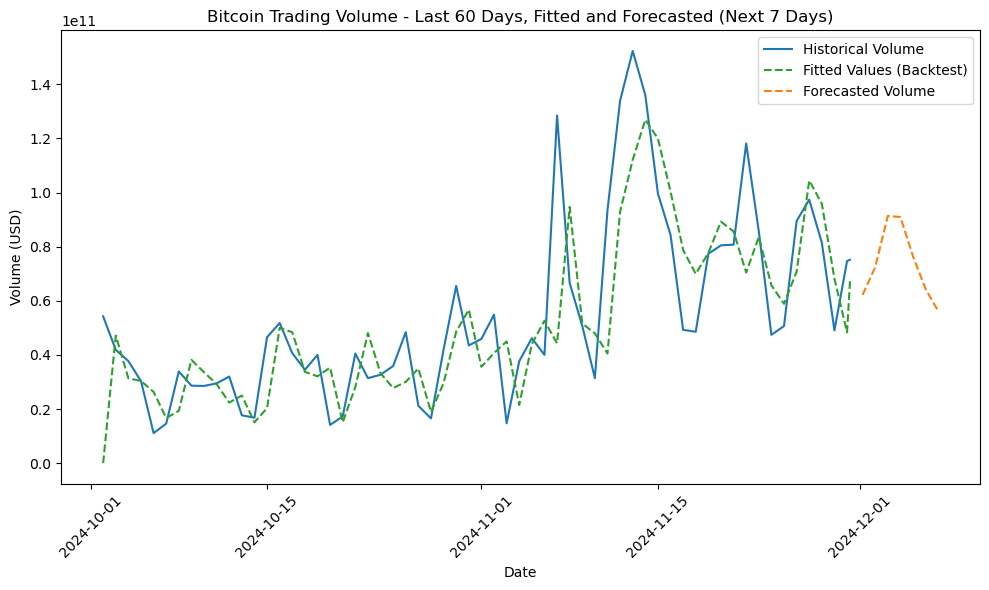

In [166]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Step 1: Fetch the last 60 days of Bitcoin volume data using CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    'vs_currency': 'usd',
    'days': '60',  # Last 60 days
    'interval': 'daily'  # Daily data
}

response = requests.get(url, params=params)
data = response.json()

# Step 2: Process the data
volumes = data['total_volumes']  # Get the trading volume data
dates = [datetime.utcfromtimestamp(item[0] / 1000) for item in volumes]  # Convert timestamps to datetime
volumes = [item[1] for item in volumes]  # Get the volume values

# Create a DataFrame
df = pd.DataFrame({'date': dates, 'volume': volumes})

# Step 3: Prepare the data for ARIMA
df.set_index('date', inplace=True)  # Set date as the index
df = df['volume']  # Use only the volume for forecasting

# Step 4: Fit the ARIMA model (we'll use ARIMA(5,1,0) as a basic example, but this could be optimized)
model = ARIMA(df, order=(10, 1, 7))  # p=5, d=1, q=0 (for simplicity, you may want to tune these parameters)
model_fit = model.fit()
# (10, 1, 7)
# Step 5: Backtest the model (predict the values on the training data itself)
fitted_values = model_fit.fittedvalues  # Fitted values for the historical data

# Step 6: Forecast the next 7 days
forecast = model_fit.forecast(steps=7)  # Forecast for the next 7 days
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 8)]  # Next 7 days
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_volume': forecast})

# Show the forecasted data
print(forecast_df)

# Step 7: Plot the historical volume, fitted values (backtest), and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values, label="Historical Volume", color='tab:blue')
plt.plot(df.index, fitted_values, label="Fitted Values (Backtest)", color='tab:green', linestyle='--')
plt.plot(future_dates, forecast, label="Forecasted Volume", color='tab:orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.title('Bitcoin Trading Volume - Last 60 Days, Fitted and Forecasted (Next 7 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/j/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/j/anaconda3/lib/python3.12/site-packages/st

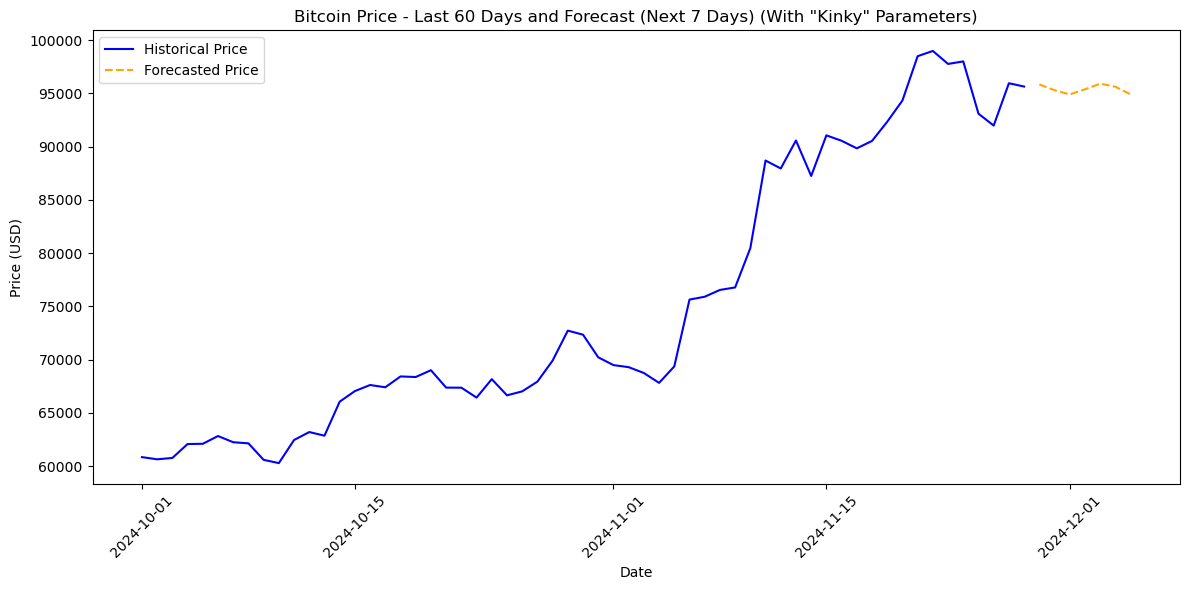

                 date  predicted_price
2024-11-29 2024-11-29     95850.443127
2024-11-30 2024-11-30     95311.333062
2024-12-01 2024-12-01     94909.317940
2024-12-02 2024-12-02     95389.451205
2024-12-03 2024-12-03     95924.439640
2024-12-04 2024-12-04     95633.581725
2024-12-05 2024-12-05     94916.070109


In [187]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Fetch Bitcoin data for the last 60 days
symbol = "BTC-USD"
end_date = datetime.now()
start_date = end_date - timedelta(days=60)

# Download the data
btc_data = yf.download(symbol, start=start_date, end=end_date)
btc_data = btc_data[['Close']]  # Use the closing price
btc_data.rename(columns={'Close': 'price'}, inplace=True)

# Fit ARIMA model with "kinky" parameters (e.g., (9, 1, 7))
model = ARIMA(btc_data['price'], order=(8,1,6))
model_fit = model.fit()


# (9, 1, 7)
# (8, 1, 6)
# (7, 1, 8)
# (10, 1, 7)
# (10, 1, 8) or (8, 1, 6)).


# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

# Add stochastic noise for even more dynamic projections
noise = np.random.normal(0, 100, size=7)  # Adjust scale for more volatility
forecast_with_noise = forecast + noise
future_dates = [btc_data.index[-1] + timedelta(days=i) for i in range(1, 8)]

# Create a DataFrame for the forecasted data
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_price': forecast_with_noise})

# Plot historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['price'], label='Historical Price', color='blue')
plt.plot(future_dates, forecast_with_noise, label='Forecasted Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price - Last 60 Days and Forecast (Next 7 Days) (With "Kinky" Parameters)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the forecasted data
print(forecast_df)
